In [69]:
import math
import numpy as np
from math import sqrt
from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import mean
from scipy.stats import norm
from scipy.stats import lognorm
import seaborn as sns
sns.set()
sns.set_style('white')

In [5]:
#kl/js divergence for histogram, boundary conditions (use edge column), and algorithm (new Grain ID column, use row then hexagonal search)

In [ ]:
#see how sampling a window (ie one tenth of the area) compares tp grid sampling 10% of the image
#go through greedy algorithm take anything around to it, go through again and merge
#double edges, quadruple double edge, have variable to keep track of grain number, use column to show if edge
#map=np.zeros((,))

In [6]:
# load file, skip header, load angles and coordinates, also grain ID
coords=np.loadtxt('Raw Data/AZ31B Ecomp 10e0 Int_3 raw1.txt', skiprows=17, usecols=(3,4))
grain_IDs=np.loadtxt('Raw Data/AZ31B Ecomp 10e0 Int_3 raw1.txt', skiprows=17, usecols=(8))
coords_and_grains=np.loadtxt('Raw Data/AZ31B Ecomp 10e0 Int_3 raw1.txt', skiprows=17, usecols=(3,4,8))
coords_and_grains_copy=np.copy(coords_and_grains)
#load more files or start grid in other three corners?

In [7]:
def kl_divergence(p, q):
    return np.sum(np.where((q != 0), p * np.log2(p / q), 0))
def js_divergence(p, q):
    m = 0.5 * (p + q)
    return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)

#implement for histogram, perhaps the PDF does not have the accuracy

In [23]:
# def grain_square(percent):
#     percent=percent/100
#     row_list=[]
#     for index in range(0,len(coords_and_grains)):
#         if (coords_and_grains_copy[index,0]<=int((110*percent))) and (coords_and_grains_copy[index,1]<=int((110*percent))):
#             row_list.append(coords_and_grains_copy[index])
#         else:
#             continue

#     row_tuple=tuple(row_list)
#     coords_and_grains_slice=np.vstack(row_tuple)
#     uniquegrains=np.unique(coords_and_grains_slice[:,2],return_counts=True)
#     ID, count = uniquegrains
#     params = lognorm.fit(count)
#     xvals = np.linspace(0, 200, num=200)
#     pdf = lambda x: lognorm.pdf(xvals, *params)
#     s = pdf(xvals)
#     s[s==0]=[0.000001]
#     return s
#     #return coords_and_grains_slice[:,0], coords_and_grains_slice[:,1]
#     #return count
#     #return len(grains)...revise

In [9]:
# return coords_and_grains_slice[:,0], coords_and_grains_slice[:,1]
# xcoords, ycoords = grain_square(100)
# plt.scatter(xcoords, ycoords, marker="o", alpha=0.5)

In [10]:
#PDF of all pixels
uniquegrains=np.unique(grain_IDs,return_counts=True)
ID, count = uniquegrains
params = lognorm.fit(count)
xvals = np.linspace(0, 200, num=200)
pdf = lambda x: lognorm.pdf(xvals, *params)
t = pdf(xvals)
t[t==0]=[0.000001]

In [11]:
# sns.distplot(count, hist=True, bins=250, kde=True, color='red')
# plt.xlim(0, 200)
# plt.title("Grain Size Histogram, Actual")
# plt.xlabel('Grain Size')
# plt.ylabel('Frequency')

In [1]:
# fig, ax = plt.subplots()
# plt.plot(xvals, t, color='red')

# #under 20 there is odd behavior, similar to sharp oscillations out of range with JS Divergence at small values...ask

# #too similar? if mean is close 
# for percent in range (15,100,10):
#     plt.plot(xvals, grain_square(percent), color='blue')
# plt.title("Lognormal Probability Density Function")
# plt.xlabel('Grain Size')
# plt.ylabel('Probability Density')


In [19]:
#definition used for histograms

# def grain_square(percent):
#     percent=percent/100
#     row_list=[]
#     for index in range(0,len(coords_and_grains)):
#         if (coords_and_grains_copy[index,0]<=int((110*percent))) and (coords_and_grains_copy[index,1]<=int((110*percent))):
#             row_list.append(coords_and_grains_copy[index])
#         else:
#             continue

#     row_tuple=tuple(row_list)
#     coords_and_grains_slice=np.vstack(row_tuple)
#     uniquegrains=np.unique(coords_and_grains_slice[:,2],return_counts=True)
#     ID, count = uniquegrains
#     params = lognorm.fit(count)
#     xvals = np.linspace(0, 200, num=200)
#     pdf = lambda x: lognorm.pdf(xvals, *params)
#     s = pdf(xvals)
#     s[s==0]=[0.000001]
#     return count

# #at 15, histogram loses shape
# sns.distplot(grain_square(10), hist=True, bins=250, kde=True, color='red')
# plt.xlim(0, 200)
# plt.title("Grain Size Histogram, 10%")
# plt.xlabel('Grain Size')
# plt.ylabel('Frequency')

In [13]:
# sns.distplot(grain_square(15), hist=True, bins=250, kde=True, color='red')
# plt.xlim(0, 200)
# plt.title("Grain Size Histogram, 15%")
# plt.xlabel('Grain Size')
# plt.ylabel('Frequency')

In [14]:
# sns.distplot(grain_square(20), hist=True, bins=250, kde=True, color='red')
# plt.xlim(0, 200)
# plt.title("Grain Size Histogram, 20%")
# plt.xlabel('Grain Size')
# plt.ylabel('Frequency')

In [15]:
# sns.distplot(grain_square(50), hist=True, bins=250, kde=True, color='red')
# plt.xlim(0, 200)
# plt.title("Grain Size Histogram, 50%")
# plt.xlabel('Grain Size')
# plt.ylabel('Frequency')

In [16]:
# sns.distplot(grain_square(75), hist=True, bins=250, kde=True, color='red')
# plt.xlim(0, 200)
# plt.title("Grain Size Histogram, 75%")
# plt.xlabel('Grain Size')
# plt.ylabel('Frequency')

In [17]:
# sns.distplot(grain_square(100), hist=True, bins=250, kde=True, color='red')
# plt.xlim(0, 200)
# plt.title("Grain Size Histogram, 100%")
# plt.xlabel('Grain Size')
# plt.ylabel('Frequency')

In [20]:
#bottom left
def grain_square(percent):
    percent=percent/100
    row_list=[]
    for index in range(0,len(coords_and_grains)):
        if (coords_and_grains_copy[index,0]<=int((110*percent))) and (coords_and_grains_copy[index,1]<=int((110*percent))):
            row_list.append(coords_and_grains_copy[index])
        else:
            continue

    row_tuple=tuple(row_list)
    coords_and_grains_slice=np.vstack(row_tuple)
    uniquegrains=np.unique(coords_and_grains_slice[:,2],return_counts=True)
    ID, count = uniquegrains
    params = lognorm.fit(count)
    xvals = np.linspace(0, 200, num=200)
    pdf = lambda x: lognorm.pdf(xvals, *params)
    s = pdf(xvals)
    s[s==0]=[0.000001]
    return s

x4=[]
y4=[]
for percent in range(20,100,1):
    x4.append(percent)
    y4.append(js_divergence(t,grain_square(percent)))

In [21]:
for percent in range(0,110,10):
    print(str(percent)+"%: "+str(js_divergence(t,grain_square(percent))))

0%: 0.4700487980308005
10%: 1.3894029342672742
20%: 0.02239342669642931
30%: 0.01594710640119918
40%: 0.016047580902467943
50%: 0.021906208648236912
60%: 0.015417900370640922
70%: 0.014281785539952926
80%: 0.008011367104766007
90%: 0.01045908315347855
100%: 0.0


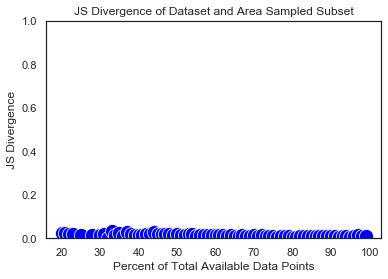

In [22]:
plt.title('JS Divergence of Dataset and Area Sampled Subset')
plt.xlabel('Percent of Total Available Data Points')
plt.ylabel('JS Divergence')
plt.ylim(0, 1)
sns.scatterplot(x4, y4, s=200, color="blue", marker="o")
#seems almost too good, is it simply finding something close enough to the average grain size ?

In [55]:
def grain_square(percent):
    percent=percent/100
    row_list=[]
    for index in range(0,len(coords_and_grains)):
        if (coords_and_grains_copy[index,0]<=int((110*percent))) and (coords_and_grains_copy[index,1]>=int((110*percent))):
            row_list.append(coords_and_grains_copy[index])
        else:
            continue

    row_tuple=tuple(row_list)
    coords_and_grains_slice=np.vstack(row_tuple)
    uniquegrains=np.unique(coords_and_grains_slice[:,2],return_counts=True)
    ID, count = uniquegrains
    params = lognorm.fit(count)
    xvals = np.linspace(0, 200, num=200)
    pdf = lambda x: lognorm.pdf(xvals, *params)
    s = pdf(xvals)
    s[s==0]=[0.000001]
    #return s
    return coords_and_grains_slice[:,0], coords_and_grains_slice[:,1]

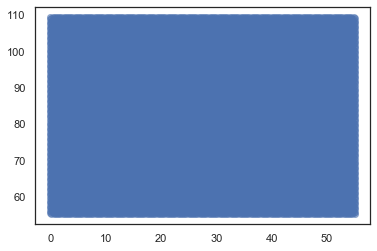

In [72]:
#top left
xcoords, ycoords = grain_square(50)
# plt.xlim(0, 110)
# plt.ylim(0, 110)
plt.scatter(xcoords, ycoords, marker="o", alpha=0.5)

In [25]:
# x5=[]
# y5=[]
# for percent in range(20,100,1):
#     x5.append(percent)
#     y5.append(js_divergence(t,grain_square(percent)))

# plt.title('JS Divergence of Dataset and Area Sampled Subset')
# plt.xlabel('Percent of Total Available Data Points')
# plt.ylabel('JS Divergence')
# plt.ylim(0, 1)
# sns.scatterplot(x5, y5, s=200, color="blue", marker="o")

In [29]:
#bottom right
def grain_square(percent):
    percent=percent/100
    row_list=[]
    for index in range(0,len(coords_and_grains)):
        if (coords_and_grains_copy[index,0]>=int((110*percent))) and (coords_and_grains_copy[index,1]<=int((110*percent))):
            row_list.append(coords_and_grains_copy[index])
        else:
            continue

    row_tuple=tuple(row_list)
    coords_and_grains_slice=np.vstack(row_tuple)
    uniquegrains=np.unique(coords_and_grains_slice[:,2],return_counts=True)
    ID, count = uniquegrains
    params = lognorm.fit(count)
    xvals = np.linspace(0, 200, num=200)
    pdf = lambda x: lognorm.pdf(xvals, *params)
    s = pdf(xvals)
    s[s==0]=[0.000001]
    #return s
    return coords_and_grains_slice[:,0], coords_and_grains_slice[:,1]

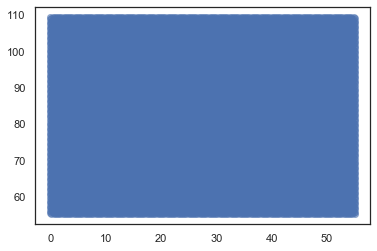

In [71]:
xcoords, ycoords = grain_square(50)
plt.scatter(xcoords, ycoords, marker="o", alpha=0.5)

In [26]:
# x6=[]
# y6=[]
# for percent in range(20,100,1):
#     x6.append(percent)
#     y6.append(js_divergence(t,grain_square(percent)))

# plt.title('JS Divergence of Dataset and Area Sampled Subset')
# plt.xlabel('Percent of Total Available Data Points')
# plt.ylabel('JS Divergence')
# plt.ylim(0, 1)
# sns.scatterplot(x6, y6, s=200, color="blue", marker="o")

In [57]:
#bottom right
def grain_square(percent):
    percent=percent/100
    row_list=[]
    for index in range(0,len(coords_and_grains)):
        if (coords_and_grains_copy[index,0]<=int((110*percent))) and (coords_and_grains_copy[index,1]>=int((110*percent))):
            row_list.append(coords_and_grains_copy[index])
        else:
            continue

    row_tuple=tuple(row_list)
    coords_and_grains_slice=np.vstack(row_tuple)
    uniquegrains=np.unique(coords_and_grains_slice[:,2],return_counts=True)
    ID, count = uniquegrains
    params = lognorm.fit(count)
    xvals = np.linspace(0, 200, num=200)
    pdf = lambda x: lognorm.pdf(xvals, *params)
    s = pdf(xvals)
    s[s==0]=[0.000001]
    #return s
    return coords_and_grains_slice[:,0], coords_and_grains_slice[:,1]

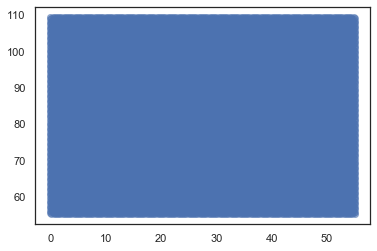

In [73]:
xcoords, ycoords = grain_square(50)
plt.scatter(xcoords, ycoords, marker="o", alpha=0.5)

In [31]:
# x7=[]
# y7=[]
# for percent in range(20,100,1):
#     x7.append(percent)
#     y7.append(js_divergence(t,grain_square(percent)))

# plt.title('JS Divergence of Dataset and Area Sampled Subset')
# plt.xlabel('Percent of Total Available Data Points')
# plt.ylabel('JS Divergence')
# plt.ylim(0, 1)
# sns.scatterplot(x7, y7, s=200, color="blue", marker="o")

In [14]:
# def misorientation(euler_one, euler_two):
#     #orientation matrices
#     g_one=np.array([[((math.cos(euler_one[0]))*(math.cos(euler_one[2]))-(math.sin(euler_one[0]))*(math.sin(euler_one[2]))*(math.cos(euler_one[1]))),((math.sin(euler_one[0]))*(math.cos(euler_one[2]))+(math.cos(euler_one[0]))*(math.sin(euler_one[2]))*(math.cos(euler_one[1]))),((math.sin(euler_one[2]))*(math.sin(euler_one[1])))],
#                 [(-(math.cos(euler_one[0]))*(math.sin(euler_one[2]))-(math.sin(euler_one[0]))*(math.cos(euler_one[2]))*(math.cos(euler_one[1]))),(-(math.sin(euler_one[0]))*(math.sin(euler_one[2]))+(math.cos(euler_one[0]))*(math.cos(euler_one[2]))*(math.cos(euler_one[1]))),((math.cos(euler_one[2]))*(math.sin(euler_one[1])))],
#                 [((math.sin(euler_one[0]))*(math.sin(euler_one[1]))),(-(math.cos(euler_one[0]))*(math.sin(euler_one[1]))),(math.cos(euler_one[1]))]        
#                 ])
   
#     #euler_two
#     g_two=np.array([[((math.cos(euler_two[0]))*(math.cos(euler_two[2]))-(math.sin(euler_two[0]))*(math.sin(euler_two[2]))*(math.cos(euler_two[1]))),((math.sin(euler_two[0]))*(math.cos(euler_two[2]))+(math.cos(euler_two[0]))*(math.sin(euler_two[2]))*(math.cos(euler_two[1]))),((math.sin(euler_two[2]))*(math.sin(euler_two[1])))],
#                 [(-(math.cos(euler_two[0]))*(math.sin(euler_two[2]))-(math.sin(euler_two[0]))*(math.cos(euler_two[2]))*(math.cos(euler_two[1]))),(-(math.sin(euler_two[0]))*(math.sin(euler_two[2]))+(math.cos(euler_two[0]))*(math.cos(euler_two[2]))*(math.cos(euler_two[1]))),((math.cos(euler_two[2]))*(math.sin(euler_two[1])))],
#                 [((math.sin(euler_two[0]))*(math.sin(euler_two[1]))),(-(math.cos(euler_two[0]))*(math.sin(euler_two[1]))),(math.cos(euler_two[1]))]        
#                 ])
    
#     #misorientation matrix
#     delta_g=np.dot(g_one,np.linalg.inv(g_two))
                     
    
#     #misorientation angle
#     #error handling for rounding errors outside of domain
#     try:
#         theta=math.acos((delta_g[0,0]+delta_g[1,1]+delta_g[2,2]-1)/2)
#     except:
#         if (((delta_g[0,0]+delta_g[1,1]+delta_g[2,2]-1)/2)>1):
#             theta=0
#         else:
#             theta=180

#     return math.degrees(theta)